# Investigate Hotel Business using Data Visualization

## 1. Import Library

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import scipy.stats as scp
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Import Dataset

In [2]:
df = pd.read_csv('hotel_bookings_data.csv', error_bad_lines=False, warn_bad_lines=True)
pd.set_option('display.max_columns', None)
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## 3. Data Pre-Processing

### 3.1 Handling Duplicated Data

In [4]:
#Check duplicated data
df.duplicated().sum()

33261

In [5]:
#Drop duplicated data
df.drop_duplicates(inplace = True)

In [6]:
#Check duplicated data
df.duplicated().sum()

0

### 3.2 Handling Missing Value

In [7]:
# Cek missing value
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_weekdays_nights              0
adults                                0
children                              4
babies                                0
meal                                  0
city                                450
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
booking_changes                       0
deposit_type                          0
agent                             11941
company                           81019
days_in_waiting_list                  0
customer_type                         0


In [8]:
def check_null(df) :
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = round((col_na/len(df))*100,3)
    
    missing_data = pd.concat([col_na, percent],axis=1, keys=['Total Missing Values','Percentage(%)'])
    print(missing_data[missing_data['Total Missing Values'] > 0])
    
check_null(df) 

          Total Missing Values  Percentage(%)
company                  81019         94.067
agent                    11941         13.864
city                       450          0.522
children                     4          0.005


In [9]:
df.dropna(inplace=True, subset=['city', 'children','agent'])
df = df.drop(axis =1, columns = ['company'])
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74061 entries, 3 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           74061 non-null  object 
 1   is_canceled                     74061 non-null  int64  
 2   lead_time                       74061 non-null  int64  
 3   arrival_date_year               74061 non-null  int64  
 4   arrival_date_month              74061 non-null  object 
 5   arrival_date_week_number        74061 non-null  int64  
 6   arrival_date_day_of_month       74061 non-null  int64  
 7   stays_in_weekend_nights         74061 non-null  int64  
 8   stays_in_weekdays_nights        74061 non-null  int64  
 9   adults                          74061 non-null  int64  
 10  children                        74061 non-null  float64
 11  babies                          74061 non-null  int64  
 12  meal                           

### 3.3 Handling Incompatible Data Types

In [11]:
df = df.astype({'children': 'int64', 'agent': 'int64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74061 entries, 3 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           74061 non-null  object 
 1   is_canceled                     74061 non-null  int64  
 2   lead_time                       74061 non-null  int64  
 3   arrival_date_year               74061 non-null  int64  
 4   arrival_date_month              74061 non-null  object 
 5   arrival_date_week_number        74061 non-null  int64  
 6   arrival_date_day_of_month       74061 non-null  int64  
 7   stays_in_weekend_nights         74061 non-null  int64  
 8   stays_in_weekdays_nights        74061 non-null  int64  
 9   adults                          74061 non-null  int64  
 10  children                        74061 non-null  int64  
 11  babies                          74061 non-null  int64  
 12  meal                           

### 3.4 Handling Inappropriate Values

In [12]:
#Feature Meal
df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

In [13]:
df['meal'].value_counts()

Breakfast     56150
No Meal        9155
Dinner         8127
Undefined       343
Full Board      286
Name: meal, dtype: int64

In [14]:
df['meal'] = df['meal'].replace('Undefined','No Meal', inplace = True)

In [15]:
df['meal'].value_counts()

Series([], Name: meal, dtype: int64)

### 3.5 Handling Unnecessary Data

In [16]:
#Feature total_customer
df['total_guest'] = df['adults'] + df['children'] + df['babies']

In [17]:
df[['adults','children','babies','total_guest']].sample(5)

,adults,children,babies,total_guest
106371,1,0,0,1
19477,2,0,0,2
64791,2,1,0,3
31347,2,0,0,2
24525,2,0,0,2


In [18]:
df[df['total_guest'] == 0].head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest
3181,Resort Hotel,0,36,2017,January,47,20,1,2,0,0,0,None,Kota Batu,Groups,TA/TO,0,0,0,0,No Deposit,38,0,Family,0.0,0,0,Check-Out,0
3684,Resort Hotel,0,165,2017,February,53,30,1,4,0,0,0,None,Kota Denpasar,Groups,TA/TO,0,0,0,1,No Deposit,308,122,Family,0.0,0,0,Check-Out,0
3708,Resort Hotel,0,165,2017,February,53,30,2,4,0,0,0,None,Kota Denpasar,Groups,TA/TO,0,0,0,1,No Deposit,308,122,Family,0.0,0,0,Check-Out,0
32029,Resort Hotel,0,4,2019,March,2,14,0,1,0,0,0,None,Kota Denpasar,Groups,TA/TO,0,0,0,0,No Deposit,168,0,Family,0.0,0,0,Check-Out,0
40392,City Hotel,0,132,2017,September,30,23,2,5,0,0,0,None,Kota Denpasar,Groups,TA/TO,0,0,0,4,No Deposit,1,0,Family,0.0,0,0,Check-Out,0


In [19]:
df = df[df['total_guest'] > 0]

In [20]:
df.shape

(73947, 29)

## 4. Exploratory Data Analysis

### 4.1 Monthly Hotel Booking Analysis Based on Hotel Type

In [21]:
df1 = df.copy()
df1.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,None,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304,0,Personal,75.0,0,0,Check-Out,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,None,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,Personal,98.0,0,1,Check-Out,2
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,0,0,None,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,303,0,Personal,103.0,0,1,Check-Out,2
8,Resort Hotel,1,85,2017,September,27,1,0,3,2,0,0,None,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,Personal,82.0,0,1,Canceled,2
9,Resort Hotel,1,75,2017,September,27,1,0,3,2,0,0,None,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,15,0,Personal,105.5,0,0,Canceled,2


In [22]:
df1= df1.groupby(['arrival_date_month', 'hotel'])['arrival_date_year'].agg(['nunique', 'count']).reset_index()
df1.columns = ['arrival_month','hotel_type','unique_year', 'total_bookings'] # mengubah nama kolom tabel
df1

,arrival_month,hotel_type,unique_year,total_bookings
0,April,City Hotel,2,3065
1,April,Resort Hotel,2,1800
2,August,City Hotel,2,4488
3,August,Resort Hotel,2,2407
4,December,City Hotel,2,3615
5,December,Resort Hotel,2,1811
6,February,City Hotel,2,2584
7,February,Resort Hotel,2,1562
8,January,City Hotel,2,2406
9,January,Resort Hotel,2,1587


In [23]:
df1['avg_total_bookings'] = round(df1['total_bookings']/df1['unique_year'],2)
df1

,arrival_month,hotel_type,unique_year,total_bookings,avg_total_bookings
0,April,City Hotel,2,3065,1532.50
1,April,Resort Hotel,2,1800,900.00
2,August,City Hotel,2,4488,2244.00
3,August,Resort Hotel,2,2407,1203.50
4,December,City Hotel,2,3615,1807.50
5,December,Resort Hotel,2,1811,905.50
6,February,City Hotel,2,2584,1292.00
7,February,Resort Hotel,2,1562,781.00
8,January,City Hotel,2,2406,1203.00
9,January,Resort Hotel,2,1587,793.50


In [24]:
mapping_month = {'January' : 1, 'February' : 2, 'March' : 3, 'April' : 4,
                 'May' : 5, 'June' : 6, 'July' : 7, 'August' : 8, 'September' : 9, 
                 'October' : 10, 'November' : 11, 'December' : 12}
df1['num_of_month'] = df1['arrival_month'].map(mapping_month)
df1 = df1.sort_values('num_of_month').reset_index(drop=True)
df1

,arrival_month,hotel_type,unique_year,total_bookings,avg_total_bookings,num_of_month
0,January,City Hotel,2,2406,1203.00,1
1,January,Resort Hotel,2,1587,793.50,1
2,February,City Hotel,2,2584,1292.00,2
3,February,Resort Hotel,2,1562,781.00,2
4,March,Resort Hotel,2,1312,656.00,3
5,March,City Hotel,2,2297,1148.50,3
6,April,City Hotel,2,3065,1532.50,4
7,April,Resort Hotel,2,1800,900.00,4
8,May,Resort Hotel,2,1890,945.00,5
9,May,City Hotel,2,4315,2157.50,5


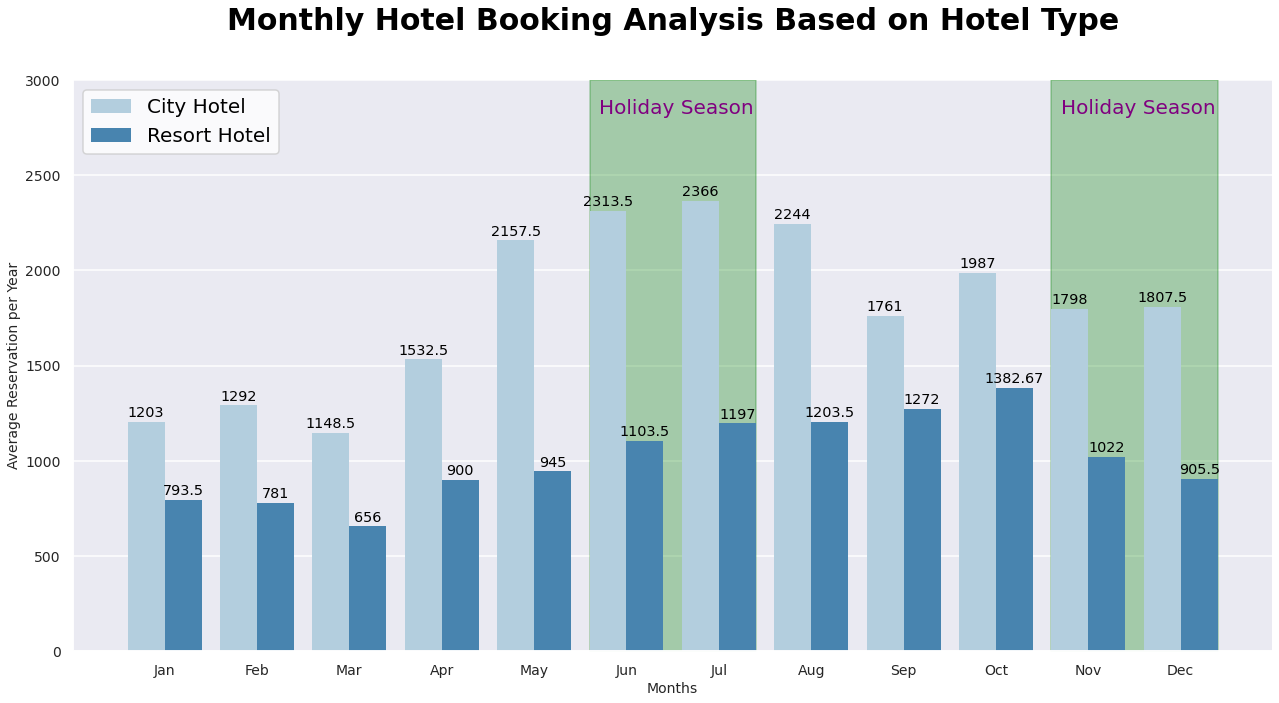

In [25]:
# Plot graph
sns.set_context("talk", font_scale=0.8)
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(18,10))
    plt.title("Monthly Hotel Booking Analysis Based on Hotel Type", fontsize=30, 
          color='black', weight='bold', pad=50)
    sns.barplot(data=df1, x='arrival_month', y='avg_total_bookings', 
            hue='hotel_type', edgecolor='none', palette='Blues')

# Set label in x and y axis
plt.xlabel('Months', fontsize=14)
plt.xticks(np.arange(12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel('Average Reservation per Year', fontsize=14)
plt.ylim(0, 3000)
plt.legend(loc='upper left', fontsize=20)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

# Add value label to the bars
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

# Set First holiday season
plt.axvline(4,6, ls='--', color='purple')
plt.axvline(6,4, ls='--', color='purple')
plt.stackplot([4.6, 5.6, 6.4], [[3000]], color='green', alpha=0.3)
plt.text(x=4.70, y=2850, s='Holiday Season', fontsize=20, color='purple', va='center')

# # Set Second holiday season
plt.axvline(10,6, ls='--', color='purple')
plt.axvline(11,4, ls='--', color='purple')
plt.stackplot([9.6, 11.4], [[3000]], color='green', alpha=0.3)
plt.text(x=9.70, y=2850, s='Holiday Season', fontsize=20, color='purple', va='center')

sns.despine()
plt.tight_layout()
plt.savefig('Monthly Hotel Booking Analysis Based on Hotel Type.png', dpi=200);

### 4.2 Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

In [26]:
df2 = df.copy()
df2.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,None,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304,0,Personal,75.0,0,0,Check-Out,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,None,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,Personal,98.0,0,1,Check-Out,2
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,0,0,None,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,303,0,Personal,103.0,0,1,Check-Out,2
8,Resort Hotel,1,85,2017,September,27,1,0,3,2,0,0,None,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,Personal,82.0,0,1,Canceled,2
9,Resort Hotel,1,75,2017,September,27,1,0,3,2,0,0,None,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,15,0,Personal,105.5,0,0,Canceled,2


In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73947 entries, 3 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           73947 non-null  object 
 1   is_canceled                     73947 non-null  int64  
 2   lead_time                       73947 non-null  int64  
 3   arrival_date_year               73947 non-null  int64  
 4   arrival_date_month              73947 non-null  object 
 5   arrival_date_week_number        73947 non-null  int64  
 6   arrival_date_day_of_month       73947 non-null  int64  
 7   stays_in_weekend_nights         73947 non-null  int64  
 8   stays_in_weekdays_nights        73947 non-null  int64  
 9   adults                          73947 non-null  int64  
 10  children                        73947 non-null  int64  
 11  babies                          73947 non-null  int64  
 12  meal                           

In [28]:
df2['stay_duration'] = df2['stays_in_weekend_nights'] + df2['stays_in_weekdays_nights']
df2[['stays_in_weekend_nights','stays_in_weekdays_nights','stay_duration']]

,stays_in_weekend_nights,stays_in_weekdays_nights,stay_duration
3,0,1,1
4,0,2,2
7,0,2,2
8,0,3,3
9,0,3,3
...,...,...,...
119385,2,5,7
119386,2,5,7
119387,2,5,7
119388,2,5,7


In [29]:
df2.stay_duration.value_counts()

3     16084
2     12878
4     12429
1     11371
7      7111
5      6236
6      3032
10     1005
8       966
14      812
9       704
0       405
11      317
12      176
13      112
15       52
21       50
28       30
16       29
18       22
19       20
17       17
25       14
29       13
20       12
22       11
30        9
24        5
23        4
42        4
26        4
27        4
35        4
56        2
46        1
38        1
48        1
Name: stay_duration, dtype: int64

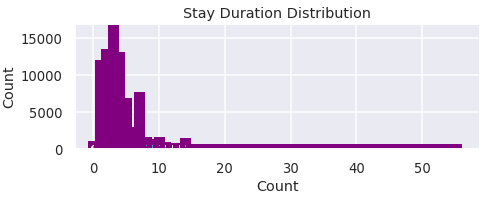

In [30]:
sns.set_context("talk", font_scale=0.8)
with sns.axes_style("darkgrid"):
  fig, ax = plt.subplots(figsize=(7,3))
  sns.histplot(x = 'stay_duration', edgecolor = 'purple', data = df2,linewidth = 10)
  ax.set_title('Stay Duration Distribution')
  plt.xlabel('Count')
  plt.tight_layout()

In [35]:

sd = []
for v in df2['stay_duration'] :
  if v >= 1 and v <= 7 :
    duration = '1 Week'
  elif v > 7 and v <= 14 :
    duration = '2 Weeks'
  elif v > 14 and v <= 21 :
    duration = '3 Weeks'
  elif v > 21 and v <= 28 :
    duration = '4 Weeks'
  else :
    duration = '5+ Weeks'
  sd.append(duration)

df2['duration_group'] = sd

In [36]:
df2.sample(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest,stay_duration,duration_group
70156,City Hotel,1,29,2019,August,24,11,2,1,2,0,0,None,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,262,0,Personal,99.0,0,0,Canceled,2,3,1 Week
83495,City Hotel,0,3,2018,April,6,4,0,1,1,0,0,None,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,9,0,Personal,86.0,0,0,Check-Out,1,1,1 Week
46678,City Hotel,0,9,2018,March,3,15,1,2,1,0,0,None,Kabupaten Tulungagung,Online TA,TA/TO,0,0,0,0,No Deposit,9,0,Personal,82.0,0,2,Check-Out,1,3,1 Week


In [38]:
df2['duration_group'].value_counts()

1 Week      69141
2 Weeks      4092
5+ Weeks      440
3 Weeks       202
4 Weeks        72
Name: duration_group, dtype: int64

In [39]:
df2 = df2.groupby(['hotel','is_canceled','duration_group'])['reservation_status'].count().reset_index()
df2
    

,hotel,is_canceled,duration_group,reservation_status
0,City Hotel,0,1 Week,31344
1,City Hotel,0,2 Weeks,418
2,City Hotel,0,3 Weeks,15
3,City Hotel,0,4 Weeks,2
4,City Hotel,0,5+ Weeks,153
5,City Hotel,1,1 Week,14418
6,City Hotel,1,2 Weeks,507
7,City Hotel,1,3 Weeks,68
8,City Hotel,1,4 Weeks,21
9,City Hotel,1,5+ Weeks,23


In [40]:
df2 = pd.pivot_table(df2,
                          index=['hotel','duration_group'],
                          columns=['is_canceled'],
                          values=['reservation_status']
                          ).reset_index()
df2.columns = ['hotel','duration_group','no_cancel','canceled']
df2['percentage'] = round((df2['canceled'] / (df2['canceled'] + df2['no_cancel'])) * 100, 2)
df2

,hotel,duration_group,no_cancel,canceled,percentage
0,City Hotel,1 Week,31344,14418,31.51
1,City Hotel,2 Weeks,418,507,54.81
2,City Hotel,3 Weeks,15,68,81.93
3,City Hotel,4 Weeks,2,21,91.30
4,City Hotel,5+ Weeks,153,23,13.07
5,Resort Hotel,1 Week,17179,6200,26.52
6,Resort Hotel,2 Weeks,2266,901,28.45
7,Resort Hotel,3 Weeks,75,44,36.97
8,Resort Hotel,4 Weeks,31,18,36.73
9,Resort Hotel,5+ Weeks,251,13,4.92


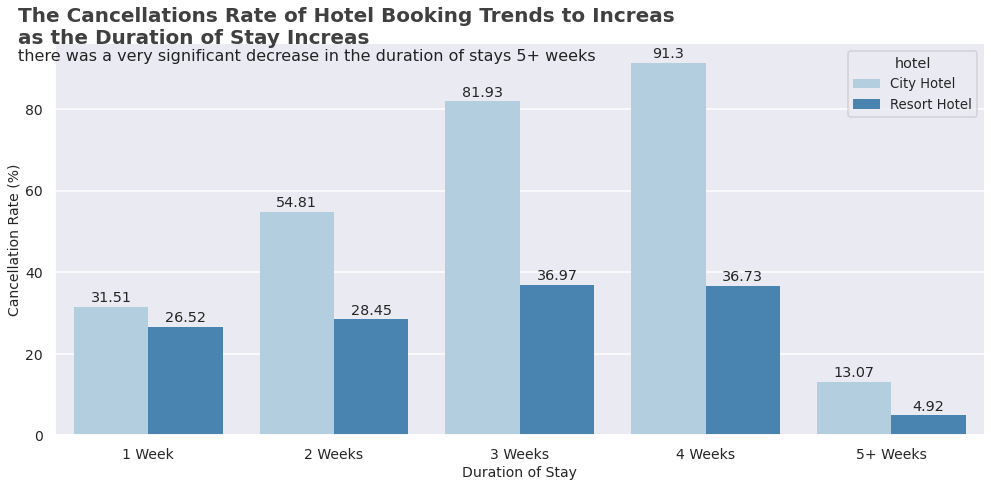

In [41]:
sns.set_context("talk", font_scale=0.8)
with sns.axes_style("darkgrid") :
    fig, ax = plt.subplots(figsize=(14, 7))
    sns.barplot(data=df2, x='duration_group', y='percentage', hue='hotel', edgecolor='none', palette='Blues')
    ax.bar_label(ax.containers[0], padding=2)
    ax.bar_label(ax.containers[1], padding=2)
    
    # ax.set_ylim(0,100)
    ax.set_xlabel('Duration of Stay', fontsize=14)
    ax.set_ylabel('Cancellation Rate (%)', fontsize=14)
    ax.text(x=-0.7, y=96, s='The Cancellations Rate of Hotel Booking Trends to Increas \nas the Duration of Stay Increas',
        fontsize=20, weight='bold', alpha=.75)
    ax.text(x=-0.7, y=92, s='there was a very significant decrease in the duration of stays 5+ weeks', 
        fontsize=16, alpha=.85)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
    
    sns.despine()
    plt.tight_layout()
    plt.savefig('The Cancellation Rate of Hotel Booking.png', dpi=200);

### 4.3 Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

In [62]:
df3 = df.copy()
df3.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,None,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304,0,Personal,75.0,0,0,Check-Out,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,None,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,Personal,98.0,0,1,Check-Out,2
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,0,0,None,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,303,0,Personal,103.0,0,1,Check-Out,2
8,Resort Hotel,1,85,2017,September,27,1,0,3,2,0,0,None,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,Personal,82.0,0,1,Canceled,2
9,Resort Hotel,1,75,2017,September,27,1,0,3,2,0,0,None,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,15,0,Personal,105.5,0,0,Canceled,2


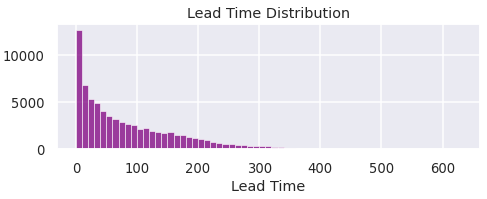

In [63]:
sns.set_context("talk", font_scale=0.8)
with sns.axes_style("darkgrid"):
  fig, ax = plt.subplots(figsize=(7,3))
  sns.histplot(x = 'lead_time', color = 'purple', data = df3, binwidth=10)
  ax.set_title('Lead Time Distribution')
  plt.xlabel('Lead Time')
  plt.ylabel('')
  plt.tight_layout()

In [64]:
max(df['lead_time'])

629

In [65]:
ld = []
for i in df3['lead_time']:
  if i>=0 and i<=90:
    waiting = '1-3 Months'
  elif i>90 and i<=180:
    waiting = '4-6 Months'
  elif i>180 and i<=270:
    waiting = '7-9 Months'
  elif i>270 and i<=360:
    waiting = '10-12 Months'
  else:
    waiting = '12+ Months'
  ld.append(waiting)

df3['lead_time_group'] = ld

In [71]:
df3[['hotel', 'lead_time','lead_time_group']].sample(5)

,hotel,lead_time,lead_time_group
113679,City Hotel,49,1-3 Months
24809,Resort Hotel,134,4-6 Months
48232,City Hotel,5,1-3 Months
36322,Resort Hotel,10,1-3 Months
114079,City Hotel,45,1-3 Months


In [72]:
df3 = df3.groupby(['hotel','is_canceled','lead_time_group'])['reservation_status'].count().reset_index()
df3

,hotel,is_canceled,lead_time_group,reservation_status
0,City Hotel,0,1-3 Months,21757
1,City Hotel,0,10-12 Months,581
2,City Hotel,0,12+ Months,172
3,City Hotel,0,4-6 Months,7005
4,City Hotel,0,7-9 Months,2417
5,City Hotel,1,1-3 Months,8244
6,City Hotel,1,10-12 Months,726
7,City Hotel,1,12+ Months,197
8,City Hotel,1,4-6 Months,4100
9,City Hotel,1,7-9 Months,1770


In [73]:
leadtime_canceled = pd.pivot_table(df3,
                                   index=['hotel','lead_time_group'],
                                   columns=['is_canceled'],
                                   values=['reservation_status']
                                   ).reset_index()
leadtime_canceled.columns = ['hotel', 'lead_month', 'no_cancel', 'canceled']
leadtime_canceled['percentage'] = round((leadtime_canceled['canceled'] / 
                                         (leadtime_canceled['canceled'] + leadtime_canceled['no_cancel'])) 
                                         * 100, 2)
leadtime_canceled
     

,hotel,lead_month,no_cancel,canceled,percentage
0,City Hotel,1-3 Months,21757,8244,27.48
1,City Hotel,10-12 Months,581,726,55.55
2,City Hotel,12+ Months,172,197,53.39
3,City Hotel,4-6 Months,7005,4100,36.92
4,City Hotel,7-9 Months,2417,1770,42.27
5,Resort Hotel,1-3 Months,12784,3376,20.89
6,Resort Hotel,10-12 Months,737,529,41.79
7,Resort Hotel,12+ Months,108,33,23.40
8,Resort Hotel,4-6 Months,4012,2038,33.69
9,Resort Hotel,7-9 Months,2161,1200,35.70


In [74]:
mapping_interval = {
    '1-3 Months' : 0, '4-6 Months' : 1, '7-9 Months' : 2, 
    '10-12 Months' : 3, '12+ Months' : 4
}
leadtime_canceled['num_of_interval'] = leadtime_canceled['lead_month'].map(mapping_interval)
leadtime_canceled = leadtime_canceled[['hotel','num_of_interval', 'lead_month','no_cancel','canceled','percentage']]
leadtime_canceled = leadtime_canceled.sort_values('num_of_interval').reset_index(drop=True)
leadtime_canceled
     

,hotel,num_of_interval,lead_month,no_cancel,canceled,percentage
0,City Hotel,0,1-3 Months,21757,8244,27.48
1,Resort Hotel,0,1-3 Months,12784,3376,20.89
2,City Hotel,1,4-6 Months,7005,4100,36.92
3,Resort Hotel,1,4-6 Months,4012,2038,33.69
4,City Hotel,2,7-9 Months,2417,1770,42.27
5,Resort Hotel,2,7-9 Months,2161,1200,35.70
6,City Hotel,3,10-12 Months,581,726,55.55
7,Resort Hotel,3,10-12 Months,737,529,41.79
8,City Hotel,4,12+ Months,172,197,53.39
9,Resort Hotel,4,12+ Months,108,33,23.40


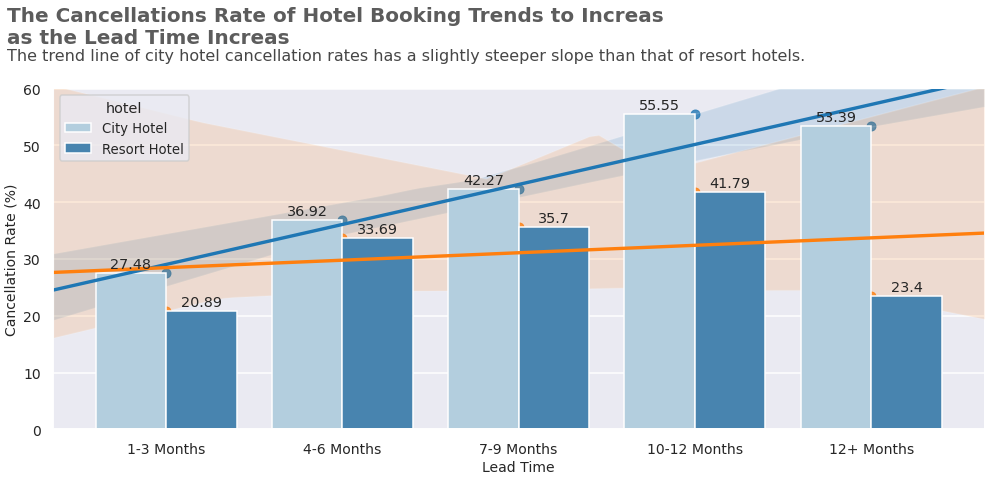

In [77]:
sns.set_context("talk", font_scale=0.8)
with sns.axes_style("darkgrid") :
    fig, ax = plt.subplots(figsize=(14, 7))
    sns.barplot(x='lead_month', y='percentage', hue='hotel', data=leadtime_canceled, palette='Blues')
    sns.regplot(x='num_of_interval', y='percentage', 
                data=leadtime_canceled[leadtime_canceled['hotel'] == 'City Hotel'],
                label='City Hotel', truncate=False)
    sns.regplot(x='num_of_interval', y='percentage', 
                data=leadtime_canceled[leadtime_canceled['hotel'] == 'Resort Hotel'],
                label='Resort Hotel', truncate=False)
    
    ax.text(x=-0.9, y=68, s='The Cancellations Rate of Hotel Booking Trends to Increas \nas the Lead Time Increas',
        fontsize=20, weight='bold', alpha=.75)
    ax.text(x=-0.9, y=65, s='The trend line of city hotel cancellation rates has a slightly steeper slope than that of resort hotels.', 
        fontsize=16, alpha=.85)
    
    ax.bar_label(ax.containers[0], padding=2)
    ax.bar_label(ax.containers[1], padding=2)
    
    ax.set_xlabel('Lead Time', fontsize=14)
    ax.set_ylabel('Cancellation Rate (%)', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_ylim(0, 60)
    
    sns.despine()
    plt.tight_layout()
    plt.savefig('The Cancellation Rate of Late Time.png', dpi=200);